# In this notebook
I create the dataset that we are going to use for the Causal Inference project.

In [8]:
import os
import numpy as np
from PIL import Image
import joblib
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

# turn labels into 1-hot encodings
import torch
import torch.nn.functional as F

In [2]:
# Load the model
km = joblib.load('../Models/kmeans.joblib')

/hpc/home/zdc6/miniconda3/envs/uhi/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.2.0 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# Create the file paths
base_path = '/datacommons/carlsonlab/fcw/planet_preprocessed/'
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")

train_images = os.listdir(os.path.join(train_path, "images"))
test_images = os.listdir(os.path.join(test_path, "images"))

In [184]:
with Image.open(os.path.join(train_path, "images", train_images[3])) as img:
    example = img.convert("RGB")

In [185]:
# Normalize image
original = np.array(example)
example = original / 255.
example -= [0.260, 249, 0.155]
example /= [0.191, 0.157, 0.134]

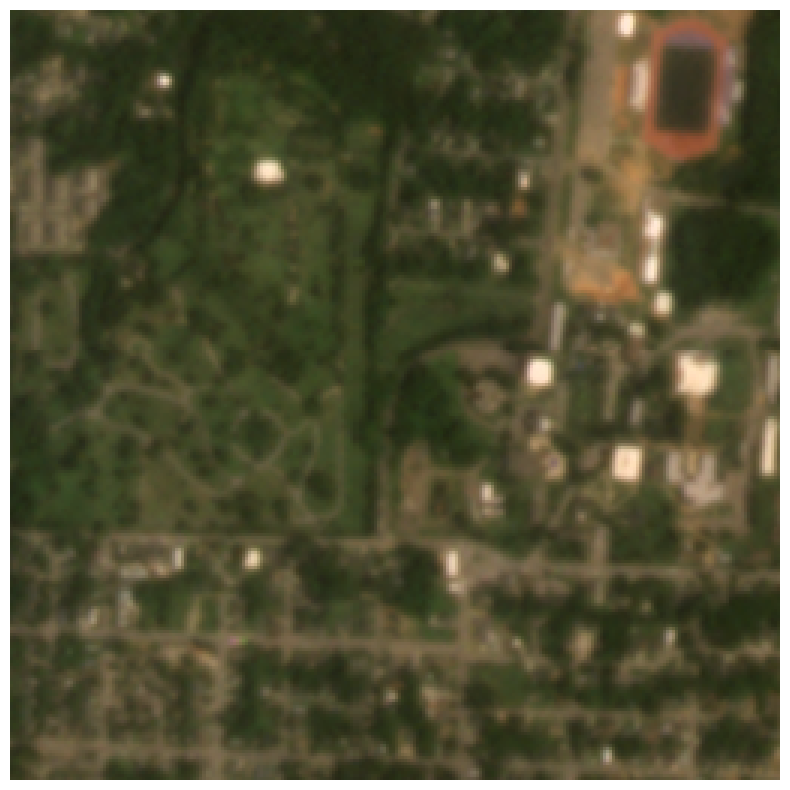

In [186]:
labels = km.predict(example.reshape(-1,3))
labels = labels.reshape(example.shape[0], example.shape[1])

plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# plt.imshow(labels, cmap="Set1")
# plt.axis(False)
# plt.subplot(2,1,2)
plt.imshow(original)
plt.axis(False)
plt.show()

(-0.5, 255.5, 255.5, -0.5)

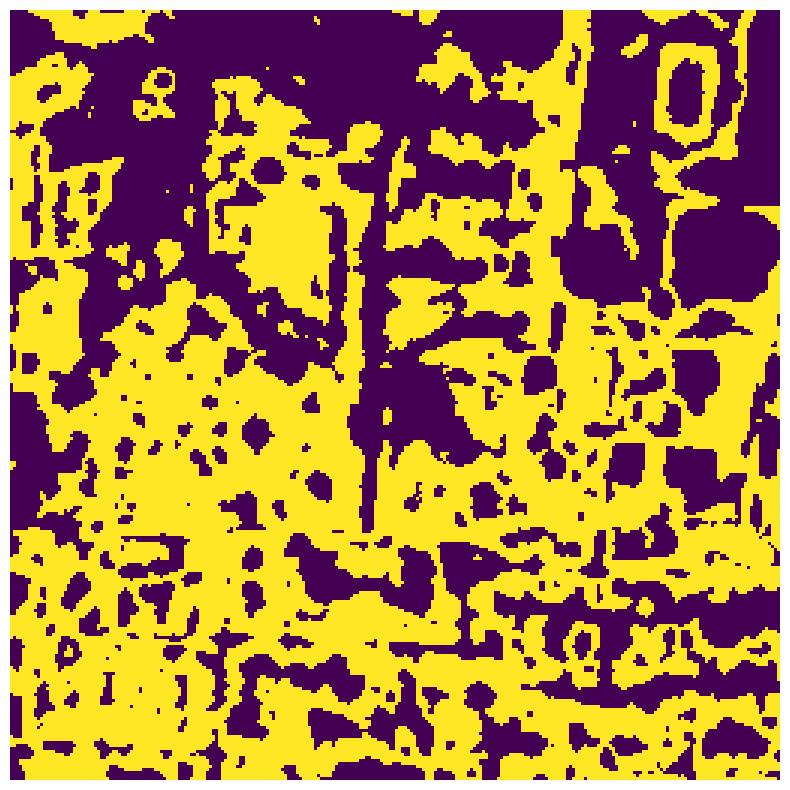

In [188]:
plt.figure(figsize=(10,10))
plt.imshow((labels == 0)) # + (labels == 7))
plt.axis(False)

In [52]:
(labels == 2) + (labels == 4)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

Alignment of images
* 0 -- grass
* 1 -- light asphalt
* 2 -- trees
* 3 -- buildings

# Ok -- now turn this into a one-hot vector.

In [162]:
# turn labels into 1-hot encodings
import torch
import torch.nn.functional as F

oh = F.one_hot(torch.from_numpy(labels).reshape(-1).to(torch.int64))

In [163]:
img = oh.reshape(256, 256, 4)

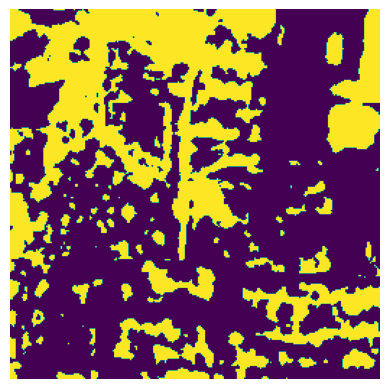

In [164]:
# Show how this one hot vector is converted.
plt.imshow(img[:, :, 2])
plt.axis(False)
plt.show()

In [11]:
# Iterate through all images, turn into a one-hot encoding
# and save into a new folder.
target_path = '/datacommons/carlsonlab/zdc6/cs590/land_use/test/'
for img_name in test_images:
    with Image.open(os.path.join(test_path, "images", img_name)) as img:
        raw_img = img.convert("RGB")
        
    # Normalize image
    raw_img = np.array(raw_img)
    raw_img = raw_img / 255.
    raw_img -= [0.260, 249, 0.155]
    raw_img /= [0.191, 0.157, 0.134]
    
    # Get the labels out
    labels = km.predict(raw_img.reshape(-1,3)).reshape(256, 256)
    
    # Convert to the one hot vector
    oh = F.one_hot(torch.from_numpy(labels).reshape(-1).to(torch.int64), 4)
    img = oh.reshape(256, 256, 4)
    
    # Save image and vector
    torch.save(img, os.path.join(target_path, 'img', img_name[:-4] + '.pt'))
    
    # Create the label and save that, too
    with open(os.path.join(test_path, "labels", img_name[:-4] + ".txt")) as fp:
        output = float(fp.read())
        
    with open(os.path.join(target_path, 'labels', img_name[:-4] + ".txt"), 'w') as fp:
        fp.write(str(output))

In [ ]:
labels